## Estadistica Aplicada
Sesión 10 - 06 septiembre

Jorge Sebastian Aguirre Jimenez 1947870

G41

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [4]:
datos=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [5]:
datos

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [6]:
exponencial=ExponentialFitter().fit(datos[' tiempo'],datos[' estado'])

In [11]:
exponencial.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

Text(0.5, 1.0, 'Funcion de riesgo exponencial')

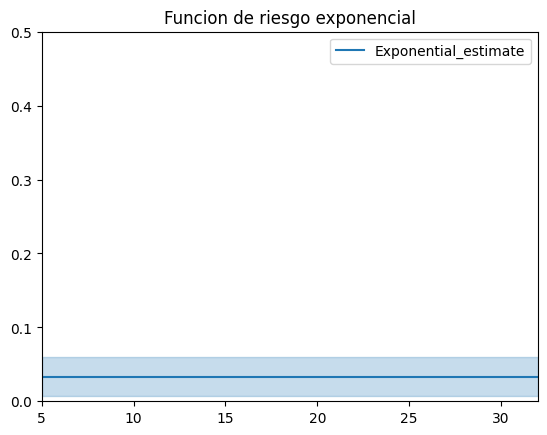

In [ ]:
exponencial.plot_hazard()
plt.xlim(5,32)
plt.ylim(0,0.5)
plt.title('Funcion de riesgo exponencial')

(5.0, 32.0)

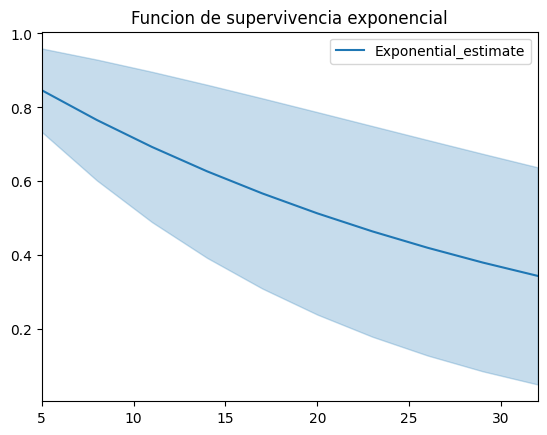

In [ ]:
exponencial.plot_survival_function()
plt.title('Funcion de supervivencia exponencial')
plt.xlim(5,32)

(5.0, 32.0)

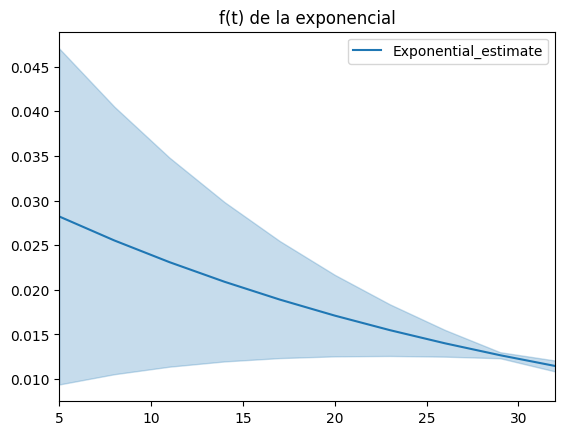

In [ ]:
exponencial.plot_density()
plt.title('f(t) de la exponencial')
plt.xlim(datos[' tiempo'].min(),datos[' tiempo'].max())

# Weibull

In [12]:
weibull=WeibullFitter().fit(datos[' tiempo'], datos[' estado'])

In [13]:
#gamma de weibull
weibull.rho_


1.8867259500116444

#### >1 entonces el riesgo es creciente

(5.0, 32.0)

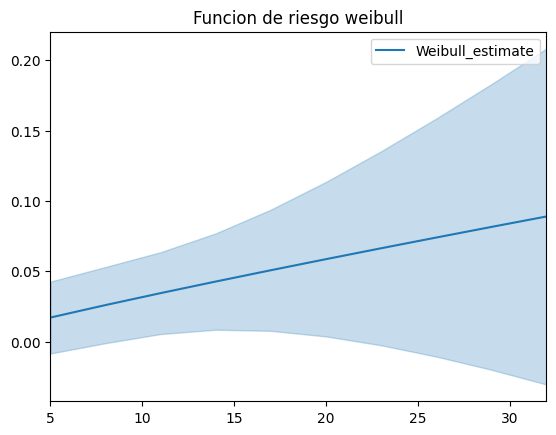

In [ ]:
#h(t)
weibull.plot_hazard()
plt.title('Funcion de riesgo weibull')
plt.xlim(datos[' tiempo'].min(),datos[' tiempo'].max())

(5.0, 32.0)

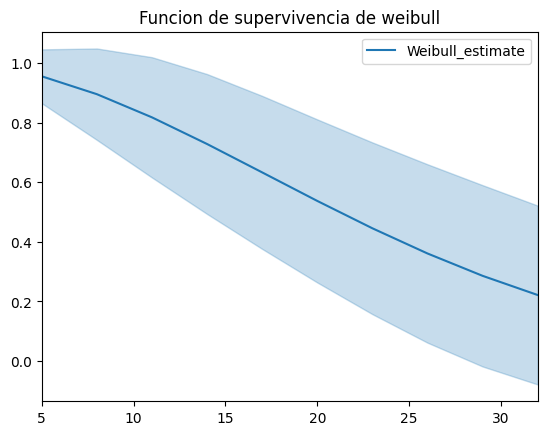

In [ ]:
# s(t)
weibull.plot_survival_function()
plt.title('Funcion de supervivencia de weibull')
plt.xlim(datos[' tiempo'].min(),datos[' tiempo'].max())

(5.0, 32.0)

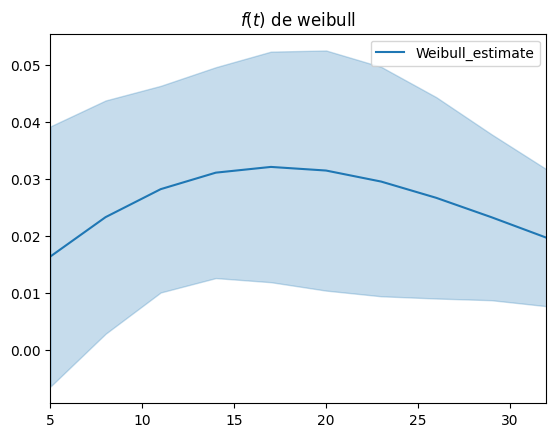

In [ ]:
# f(t)
weibull.plot_density()
plt.title('$f(t)$ de weibull')
plt.xlim(datos[' tiempo'].min(),datos[' tiempo'].max())

## Log Normal
Suponiendo que el log tiempo de supervivencia se distribuye normal+

In [9]:
logn=LogNormalFitter().fit(datos[' tiempo'], datos[' estado'])

(5.0, 32.0)

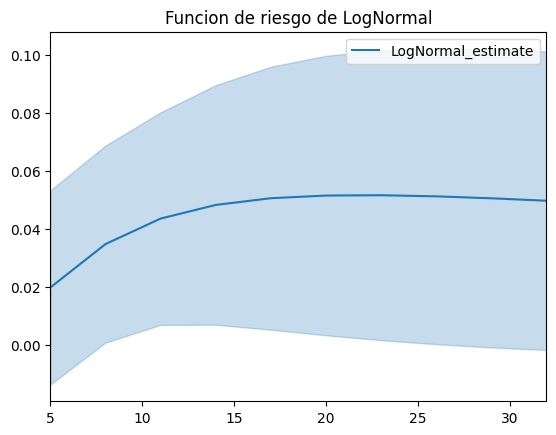

In [14]:
logn.plot_hazard()
plt.title('Funcion de riesgo de LogNormal')
plt.xlim(datos[' tiempo'].min(),datos[' tiempo'].max())

## Sesión 11 - 07 septiembre

(5.0, 32.0)

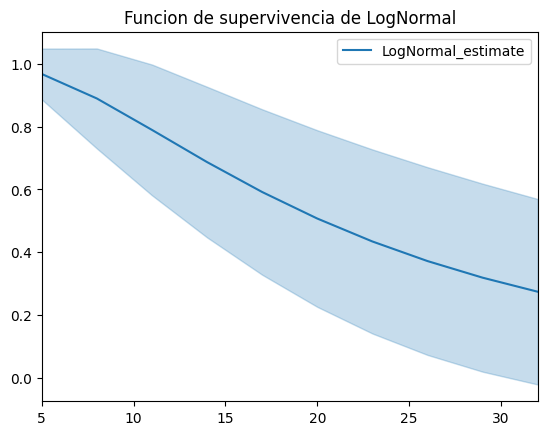

In [17]:
# Funcion de supervivencia
logn.plot_survival_function()
plt.title('Funcion de supervivencia de LogNormal')
plt.xlim(datos[' tiempo'].min(),datos[' tiempo'].max())


(5.0, 32.0)

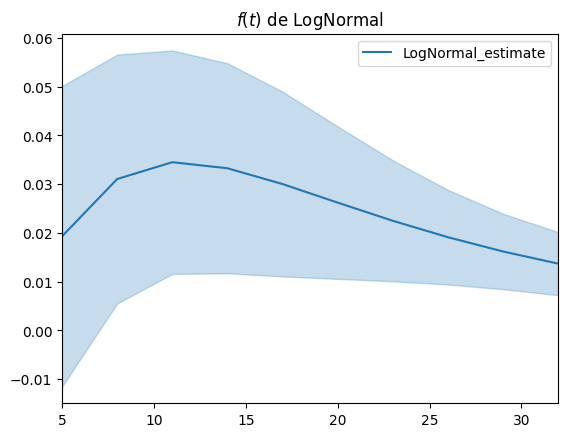

In [19]:
# f(t) log normal
logn.plot_density()
plt.title('$f(t)$ de LogNormal')
plt.xlim(datos[' tiempo'].min(),datos[' tiempo'].max())

tomamos una bd de tiempo de supervivencia, y supusimos que el tiempo de supervivencia se comportaba de forma:

    1.Exponencial
    2.Weibull
    3.LogNormal 

¿Cual de estos 3 modelos describe mejor el comportamiento de los datos?

**El criterio de Akaike (AIC)**

$AIC = -2In(Verosimilitud)+2k $

k= numero de parámetros en el modelo

De acuerdo con el criteroi de Akaike (AIC) el "mejor" modelo es el que tiene menor AIC. Este criterio elige modelos mas simples (sin muchos parametros)

In [27]:
print('AIC de 3 modelos')
print('exponencial:',exponencial.AIC_.round(2), 'weibull:',weibull.AIC_.round(2), 'LogNormal:', logn.AIC_.round(2))

AIC de 3 modelos
exponencial: 54.81 weibull: 54.16 LogNormal: 54.51


De acuerdo con el criterio de Akaike (AIC) el "mejor modelo", es decir el que mejor describe los datos de supervivencia de las recaídas de la enfermedad es el modelo Weibull. Donde el riesgo de recaer es creciente a traves del tiempo.